In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

# NORMALIZACIÓN DE VALORES ORDINALES

In [268]:
url = 'https://drive.google.com/file/d/1_dElPy5hHvvgqvQ9qYgx3JfaGJmXP8cz/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
dataframeN = pd.read_csv(path)
dataframeN2 = pd.read_csv(path)
"""
df = pd.read_csv('heart/HeartDisease.csv')
dataframeN = pd.read_csv('heart/HeartDisease.csv')
dataframeN2 = pd.read_csv('heart/HeartDisease.csv')

"""
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [269]:
df.describe()



,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# NORMALIZACIÓN DE VALORES CUANTITATIVOS

**Normalización**

     MIN - MAX

$$x' = a + \frac{x - min(x)}{max(x)-min(x)} * (b-a)$$

Donde:
- **x** es el dato origial
- **x'** dato normalizado
- **a** valor mínimo deseado
- **b** valor máximo deseado

In [270]:

columna = 'Air temperature [K]'
def minMaxNorma(dataframe,columnaNormalizar):
    maximoDeLosDatos = dataframe[columnaNormalizar].max()
    minimoDeLosDatos = dataframe[columnaNormalizar].min()
    maximoNormalizado = 1
    minimoNormalizado = -1

    rangoDeDatos = maximoDeLosDatos - minimoDeLosDatos
    rangoNormalizado = maximoNormalizado - minimoNormalizado

    p = 0
    for i in dataframe[columnaNormalizar]:
        dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado
        p += 1
    return dataframe


minMaxNorma(dataframeN,columna)
print(dataframeN.head(10))
print(dataframeN.describe())

C:\Users\garci\AppData\Local\Temp\ipykernel_9904\1946600057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.391304                    308.6   
1    2     L47181    L            -0.369565                    308.7   
2    3     L47182    L            -0.391304                    308.5   
3    4     L47183    L            -0.369565                    308.6   
4    5     L47184    L            -0.369565                    308.7   
5    6     M14865    M            -0.391304                    308.6   
6    7     L47186    L            -0.391304                    308.6   
7    8     L47187    L            -0.391304                    308.6   
8    9     M14868    M            -0.347826                    308.7   
9   10     M14869    M            -0.304348                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3           

**Normalización**

     Normlaización por media

$$x' = \frac{x - \mu}{max(x)-min(x)} $$

Donde:
- **x** es el dato origial
- **x'** dato normalizado
- **$\mu$** es la media del vector de entrada
- **a** valor mínimo deseado
- **b** valor máximo deseado

In [271]:
dataframeN.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.022811,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,0.434839,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,-1.000000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,-0.347826,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,0.043478,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,0.347826,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,1.000000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [272]:

def meanNorma(dataframeN2,columnaNormalizar):
    maximoDeLosDatos = dataframeN2[columnaNormalizar].max()
    minimoDeLosDatos = dataframeN2[columnaNormalizar].min()
    mean = dataframeN2[columnaNormalizar].mean()

    p = 0
    for i in dataframeN2[columnaNormalizar]:
        dataframeN2[columnaNormalizar][p] = ((i-mean)/maximoDeLosDatos-minimoDeLosDatos)
        p += 1
    return dataframeN2

meanNorma(dataframeN2,columna)
print(dataframeN2.head(10))
print(dataframeN2.describe())

C:\Users\garci\AppData\Local\Temp\ipykernel_9904\1685695932.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeN2[columnaNormalizar][p] = ((i-mean)/maximoDeLosDatos-minimoDeLosDatos)


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M          -295.306256                    308.6   
1    2     L47181    L          -295.305928                    308.7   
2    3     L47182    L          -295.306256                    308.5   
3    4     L47183    L          -295.305928                    308.6   
4    5     L47184    L          -295.305928                    308.7   
5    6     M14865    M          -295.306256                    308.6   
6    7     L47186    L          -295.306256                    308.6   
7    8     L47187    L          -295.306256                    308.6   
8    9     M14868    M          -295.305599                    308.7   
9   10     M14869    M          -295.304942                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3           

SinNormalizar
MinMax
Mean


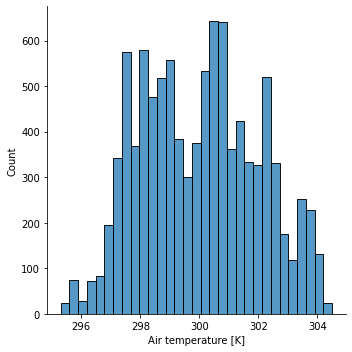

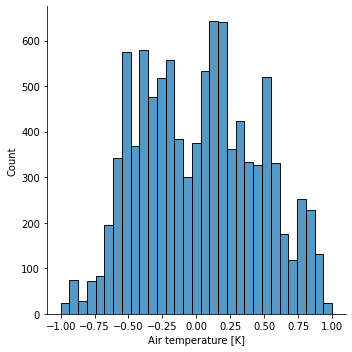

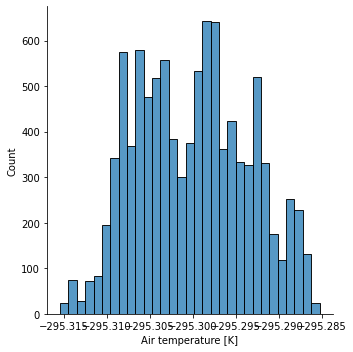

In [273]:
tipoNormalizacion = ['SinNormalizar','MinMax','Mean']
datos = [df["Air temperature [K]"],dataframeN["Air temperature [K]"],dataframeN2["Air temperature [K]"]]
for index in range(len(tipoNormalizacion)):
    print(tipoNormalizacion[index])
    sns.displot(datos[index])


# NORMALIZACIÓN DE VALORES ORDINALES

**Renombrar las columnas**

In [274]:
dataframe = dataframeN.copy()
dataframe.rename(mapper={'Air temperature [K]': 'Air_temperature',
                    'Process temperature [K]': 'Process _temperature',
                    'Rotational speed [rpm]': 'Rotational_speed',
                    'Torque [Nm]': 'Torque', 'Failure Type' : 'Failure_Type',
                    'Tool wear [min]': 'Tool_wear'}, axis=1, inplace=True)

**CAMBIAR EL TIPO DE DATO**

In [275]:

dataframe['Tool_wear'] = dataframe['Tool_wear'].astype('float64')
dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
dataframe['Target'] = dataframe['Target'].astype('float64')
del dataframe['Product ID']
print(dataframe)


        UDI Type  Air_temperature  Process _temperature  Rotational_speed  \
0         1    M        -0.391304                 308.6            1551.0   
1         2    L        -0.369565                 308.7            1408.0   
2         3    L        -0.391304                 308.5            1498.0   
3         4    L        -0.369565                 308.6            1433.0   
4         5    L        -0.369565                 308.7            1408.0   
...     ...  ...              ...                   ...               ...   
9995   9996    M        -0.239130                 308.4            1604.0   
9996   9997    H        -0.217391                 308.4            1632.0   
9997   9998    M        -0.195652                 308.6            1645.0   
9998   9999    H        -0.195652                 308.7            1408.0   
9999  10000    M        -0.195652                 308.7            1500.0   

      Torque  Tool_wear  Target Failure_Type  
0       42.8        0.0     

**NORMALIZAR LOS VALORES ORDINARIOS**

In [276]:
def normOrdinario(dataframe,attr):
  categorias=dataframe[attr].unique()
  diccionario = {}
  index = 1
  for i in categorias:
    diccionario[i] = index
    index +=1
  dataframe[attr].replace(to_replace=diccionario, inplace=True)
  return


normOrdinario(dataframe,'Type')
normOrdinario(dataframe,'Failure_Type')

dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
dataframe['Target'] = dataframe['Target'].astype('float64')
dataframe.dtypes

UDI                       int64
Type                      int64
Air_temperature         float64
Process _temperature    float64
Rotational_speed        float64
Torque                  float64
Tool_wear               float64
Target                  float64
Failure_Type              int64
dtype: object

In [277]:
dataframe['Type'] = dataframe['Type'].astype('float64')
dataframe['Failure_Type'] = dataframe['Failure_Type'].astype('float64')
dataframe.dtypes

UDI                       int64
Type                    float64
Air_temperature         float64
Process _temperature    float64
Rotational_speed        float64
Torque                  float64
Tool_wear               float64
Target                  float64
Failure_Type            float64
dtype: object

In [278]:
dataframe.describe()
#print(df.query("Failure_Type == 5"))
#print(df.query("Type == 2"))

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.80060,0.022811,310.005560,1538.776100,39.986910,107.951000,0.033900,1.105100
std,2886.89568,0.60023,0.434839,1.483734,179.284096,9.968934,63.654147,0.180981,0.628883
min,1.00000,1.00000,-1.000000,305.700000,1168.000000,3.800000,0.000000,0.000000,1.000000
25%,2500.75000,1.00000,-0.347826,308.800000,1423.000000,33.200000,53.000000,0.000000,1.000000
50%,5000.50000,2.00000,0.043478,310.100000,1503.000000,40.100000,108.000000,0.000000,1.000000
75%,7500.25000,2.00000,0.347826,311.100000,1612.000000,46.800000,162.000000,0.000000,1.000000
max,10000.00000,3.00000,1.000000,313.800000,2886.000000,76.600000,253.000000,1.000000,6.000000


In [279]:
porImputar = dataframe.isna().sum()
print(porImputar)

UDI                     0
Type                    0
Air_temperature         0
Process _temperature    0
Rotational_speed        0
Torque                  0
Tool_wear               0
Target                  0
Failure_Type            0
dtype: int64


In [280]:
dataframe.corr()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
UDI,1.000000,-0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.022649
Type,-0.005529,1.000000,-0.017599,-0.013444,0.002693,-0.004011,0.003930,0.005152,0.014988
Air_temperature,0.117428,-0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.118486
Process _temperature,0.324428,-0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.055579
Rotational_speed,-0.006615,0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,-0.119680
Torque,0.003207,-0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.190346
Tool_wear,-0.010702,0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.082888
Target,-0.022892,0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.828941
Failure_Type,-0.022649,0.014988,0.118486,0.055579,-0.119680,0.190346,0.082888,0.828941,1.000000


In [281]:
def minMaxNorma01(dataframe,columnaNormalizar):
    maximoDeLosDatos = dataframe[columnaNormalizar].max()
    minimoDeLosDatos = dataframe[columnaNormalizar].min()
    maximoNormalizado = 1
    minimoNormalizado = 0

    rangoDeDatos = maximoDeLosDatos - minimoDeLosDatos
    rangoNormalizado = maximoNormalizado - minimoNormalizado

    p = 0
    for i in dataframe[columnaNormalizar]:
        dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado
        p += 1
    return dataframe

minMaxNorma01(dataframe,'Air_temperature')
minMaxNorma01(dataframe,'Process _temperature')
minMaxNorma01(dataframe,'Rotational_speed')

C:\Users\garci\AppData\Local\Temp\ipykernel_9904\297267126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado


,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,1.0,0.304348,0.358025,0.222934,42.8,0.0,0.0,1.0
1,2,2.0,0.315217,0.370370,0.139697,46.3,3.0,0.0,1.0
2,3,2.0,0.304348,0.345679,0.192084,49.4,5.0,0.0,1.0
3,4,2.0,0.315217,0.358025,0.154249,39.5,7.0,0.0,1.0
4,5,2.0,0.315217,0.370370,0.139697,40.0,9.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,9996,1.0,0.380435,0.333333,0.253783,29.5,14.0,0.0,1.0
9996,9997,3.0,0.391304,0.333333,0.270081,31.8,17.0,0.0,1.0
9997,9998,1.0,0.402174,0.358025,0.277648,33.4,22.0,0.0,1.0
9998,9999,3.0,0.402174,0.370370,0.139697,48.5,25.0,0.0,1.0


In [282]:
dataframe.describe()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.80060,0.511405,0.531551,0.215818,39.986910,107.951000,0.033900,1.105100
std,2886.89568,0.60023,0.217419,0.183177,0.104356,9.968934,63.654147,0.180981,0.628883
min,1.00000,1.00000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,1.000000
25%,2500.75000,1.00000,0.326087,0.382716,0.148428,33.200000,53.000000,0.000000,1.000000
50%,5000.50000,2.00000,0.521739,0.543210,0.194994,40.100000,108.000000,0.000000,1.000000
75%,7500.25000,2.00000,0.673913,0.666667,0.258440,46.800000,162.000000,0.000000,1.000000
max,10000.00000,3.00000,1.000000,1.000000,1.000000,76.600000,253.000000,1.000000,6.000000


In [283]:
dataframe.corr()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
UDI,1.000000,-0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.022649
Type,-0.005529,1.000000,-0.017599,-0.013444,0.002693,-0.004011,0.003930,0.005152,0.014988
Air_temperature,0.117428,-0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.118486
Process _temperature,0.324428,-0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.055579
Rotational_speed,-0.006615,0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,-0.119680
Torque,0.003207,-0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.190346
Tool_wear,-0.010702,0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.082888
Target,-0.022892,0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.828941
Failure_Type,-0.022649,0.014988,0.118486,0.055579,-0.119680,0.190346,0.082888,0.828941,1.000000


**Renombrar las columnas**

In [284]:
dataframe = df.copy()
dataframe.rename(mapper={'Air temperature [K]': 'Air_temperature',
                    'Process temperature [K]': 'Process _temperature',
                    'Rotational speed [rpm]': 'Rotational_speed',
                    'Torque [Nm]': 'Torque', 'Failure Type' : 'Failure_Type',
                    'Tool wear [min]': 'Tool_wear'}, axis=1, inplace=True)

**CAMBIAR EL TIPO DE DATO**

In [285]:

dataframe['Tool_wear'] = dataframe['Tool_wear'].astype('float64')
dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
del dataframe['Product ID']
del dataframe['Target']
del dataframe['Failure_Type']
del dataframe['Type']
del dataframe['UDI']
print(dataframe)


      Air_temperature  Process _temperature  Rotational_speed  Torque  \
0               298.1                 308.6            1551.0    42.8   
1               298.2                 308.7            1408.0    46.3   
2               298.1                 308.5            1498.0    49.4   
3               298.2                 308.6            1433.0    39.5   
4               298.2                 308.7            1408.0    40.0   
...               ...                   ...               ...     ...   
9995            298.8                 308.4            1604.0    29.5   
9996            298.9                 308.4            1632.0    31.8   
9997            299.0                 308.6            1645.0    33.4   
9998            299.0                 308.7            1408.0    48.5   
9999            299.0                 308.7            1500.0    40.2   

      Tool_wear  
0           0.0  
1           3.0  
2           5.0  
3           7.0  
4           9.0  
...         ...

**NORMALIZAR LOS VALORES ORDINARIOS**

In [286]:
def normOrdinario(dataframe,attr):
  categorias=dataframe[attr].unique()
  diccionario = {}
  index = 1
  for i in categorias:
    diccionario[i] = index
    index +=1
  dataframe[attr].replace(to_replace=diccionario, inplace=True)
  return

dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
dataframe.dtypes

Air_temperature         float64
Process _temperature    float64
Rotational_speed        float64
Torque                  float64
Tool_wear               float64
dtype: object

In [287]:
dataframe.describe()
#print(df.query("Failure_Type == 5"))
#print(df.query("Type == 2"))

,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [288]:
porImputar = dataframe.isna().sum()
print(porImputar)

Air_temperature         0
Process _temperature    0
Rotational_speed        0
Torque                  0
Tool_wear               0
dtype: int64


In [289]:
dataframe.corr()

,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear
Air_temperature,1.000000,0.876107,0.022670,-0.013778,0.013853
Process _temperature,0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational_speed,0.022670,0.019277,1.000000,-0.875027,0.000223
Torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool_wear,0.013853,0.013488,0.000223,-0.003093,1.000000


In [290]:
dataframe.describe()

,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


<AxesSubplot:>

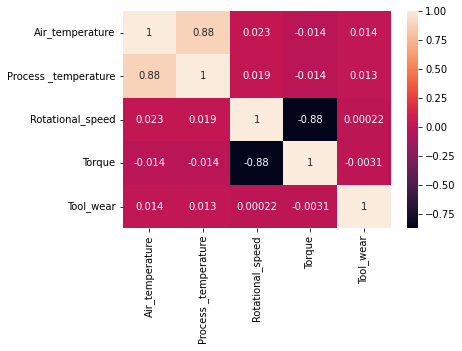

In [291]:
sns.heatmap(dataframe.corr(), annot=True)

Los pasos para implenetar PCA son los siguientes:
1.-Obtener los datos
2.-Restar su media

In [292]:
mean = dataframe.mean()
print(mean)

dataframe.dtypes

for i in dataframe:
    for j in range(10000):
        dataframe[i][j] = dataframe[i][j] - mean[i]


Air_temperature          300.00493
Process _temperature     310.00556
Rotational_speed        1538.77610
Torque                    39.98691
Tool_wear                107.95100
dtype: float64


In [293]:
dataframe.head(10)


,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear
0,-1.90493,-1.40556,12.2239,2.81309,-107.951
1,-1.80493,-1.30556,-130.7761,6.31309,-104.951
2,-1.90493,-1.50556,-40.7761,9.41309,-102.951
3,-1.80493,-1.40556,-105.7761,-0.48691,-100.951
4,-1.80493,-1.30556,-130.7761,0.01309,-98.951
5,-1.90493,-1.40556,-113.7761,1.91309,-96.951
6,-1.90493,-1.40556,19.2239,2.41309,-93.951
7,-1.90493,-1.40556,-11.7761,0.21309,-91.951
8,-1.70493,-1.30556,128.2239,-11.38691,-89.951
9,-1.50493,-1.00556,202.2239,-11.98691,-86.951


3.- Calcular la matriz de covarianza


In [294]:
cova = dataframe.cov()
cova


,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear
Air_temperature,4.001035,2.600157,8.129957,-0.274736,1.763808
Process _temperature,2.600157,2.201467,5.127798,-0.207974,1.273840
Rotational_speed,8.129957,5.127798,32142.787047,-1563.910772,2.545883
Torque,-0.274736,-0.207974,-1563.910772,99.379640,-1.962568
Tool_wear,1.763808,1.273840,2.545883,-1.962568,4051.850384


4.-Calcular los eigenvectores y eigenvalores

In [295]:
from numpy.linalg import eig

E-valor: [3.22189375e+04 4.05185214e+03 3.49743994e-01 5.84778022e+00
 2.32324544e+01]


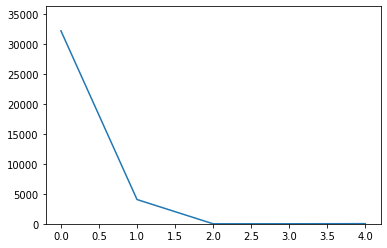

Air_temperature: 88.75686657102257
Process _temperature: 11.16205959806487
Rotational_speed: 0.0009634762493834681
Torque: 0.016109489945039242
Tool_wear: 0.06400086471814058
Se toma la desicion de trabajar con 2 componetes:
Con un componente: 88.75686657102257
Con dos componentes: 99.91892616908743


In [296]:
w,v=eig(cova)
print('E-valor:', w)
# Límites verticales
# Límites verticales
plt.plot(w)           # Añadimos el gráfico  # Mapeamos los valores horizontales
plt.ylim(0, w.sum())            # Configuramos el límite vertical
plt.show()     

print('Air_temperature:',(w[0]/w.sum())*100)
print('Process _temperature:',(w[1]/w.sum())*100)
print('Rotational_speed:',(w[2]/w.sum())*100)
print('Torque:',(w[3]/w.sum())*100)
print('Tool_wear:',(w[4]/w.sum())*100)
#Suma de eigenvalores
print("Se toma la desicion de trabajar con 2 componetes:")
print('Con un componente:',(w[0]/w.sum())*100)
print('Con dos componentes:',((w[0]+w[1])/w.sum())*100)


In [297]:
print('E-vector', v)

E-vector [[-2.52500177e-04 -4.35739178e-04  5.80127266e-01 -8.14498018e-01
   6.71425075e-03]
 [-1.59315334e-04 -3.14711561e-04 -8.14524306e-01 -5.80122383e-01
   2.83734667e-03]
 [-9.98816682e-01  1.15906973e-04 -9.37343733e-05  6.43686903e-04
   4.86292069e-02]
 [ 4.86326886e-02  4.50726519e-04 -1.58138831e-03  7.09178548e-03
   9.98790200e-01]
 [-9.36896363e-05 -9.99999747e-01  2.83239995e-06  5.40751118e-04
   4.51999201e-04]]


5.- Escoger los compentes y formar el vector de caracteristicas.
(De los eigenvalores el elemento con el numero mayor es el componente principal del set de datos)